# Lévy Processes: Theory and Simulation

## 1. Introduction

Lévy processes are a fundamental class of stochastic processes that generalize both Brownian motion and Poisson processes. They are characterized by **stationary and independent increments**, and play a crucial role in mathematical finance, physics, and probability theory.

### 1.1 Definition

A stochastic process $\{X_t\}_{t \geq 0}$ is called a **Lévy process** if:

1. $X_0 = 0$ almost surely
2. **Independent increments**: For any $0 \leq t_1 < t_2 < \cdots < t_n$, the random variables $X_{t_2} - X_{t_1}, X_{t_3} - X_{t_2}, \ldots, X_{t_n} - X_{t_{n-1}}$ are independent
3. **Stationary increments**: For any $s, t \geq 0$, the distribution of $X_{t+s} - X_s$ depends only on $t$
4. **Stochastic continuity**: For any $\epsilon > 0$ and $t \geq 0$: $\lim_{s \to t} P(|X_s - X_t| > \epsilon) = 0$

### 1.2 The Lévy-Khintchine Formula

The characteristic function of a Lévy process at time $t$ is given by:

$$\mathbb{E}[e^{i\theta X_t}] = e^{t\psi(\theta)}$$

where the **characteristic exponent** $\psi(\theta)$ is:

$$\psi(\theta) = i\gamma\theta - \frac{\sigma^2 \theta^2}{2} + \int_{\mathbb{R} \setminus \{0\}} \left(e^{i\theta x} - 1 - i\theta x \mathbf{1}_{|x|<1}\right) \nu(dx)$$

Here:
- $\gamma \in \mathbb{R}$ is the **drift** coefficient
- $\sigma \geq 0$ is the **Gaussian** (diffusion) coefficient  
- $\nu$ is the **Lévy measure** satisfying $\int_{\mathbb{R}} \min(1, x^2) \nu(dx) < \infty$

The triplet $(\gamma, \sigma^2, \nu)$ uniquely characterizes the Lévy process and is called the **Lévy triplet**.

### 1.3 Important Examples

| Process | Drift $\gamma$ | Diffusion $\sigma$ | Lévy Measure $\nu$ |
|---------|----------------|-------------------|--------------------|
| Brownian Motion | $\mu$ | $\sigma$ | $0$ |
| Poisson Process | $0$ | $0$ | $\lambda \delta_1(dx)$ |
| Compound Poisson | $0$ | $0$ | $\lambda F(dx)$ |
| $\alpha$-Stable | varies | $0$ | $c_{\pm}|x|^{-1-\alpha}dx$ |

## 2. Stable Distributions and $\alpha$-Stable Lévy Processes

### 2.1 Stable Distributions

A random variable $X$ has a **stable distribution** with index $\alpha \in (0, 2]$ if for any $n \geq 2$, there exist constants $c_n > 0$ and $d_n \in \mathbb{R}$ such that:

$$X_1 + X_2 + \cdots + X_n \stackrel{d}{=} c_n X + d_n$$

where $X_1, \ldots, X_n$ are i.i.d. copies of $X$. It can be shown that $c_n = n^{1/\alpha}$.

### 2.2 Characteristic Function of Stable Distributions

For $\alpha \in (0, 2]$, the characteristic function is:

$$\mathbb{E}[e^{i\theta X}] = \exp\left(-|c\theta|^\alpha \left[1 - i\beta \text{sign}(\theta) \Phi(\theta, \alpha)\right] + i\mu\theta\right)$$

where:
- $\alpha \in (0, 2]$ is the **stability index** (tail heaviness)
- $\beta \in [-1, 1]$ is the **skewness parameter**
- $c > 0$ is the **scale parameter**
- $\mu \in \mathbb{R}$ is the **location parameter**

And:
$$\Phi(\theta, \alpha) = \begin{cases} \tan\left(\frac{\pi\alpha}{2}\right) & \alpha \neq 1 \\ -\frac{2}{\pi}\log|\theta| & \alpha = 1 \end{cases}$$

### 2.3 Heavy Tails

For $\alpha < 2$, stable distributions exhibit **heavy tails** with power-law decay:

$$P(X > x) \sim C_+ x^{-\alpha} \quad \text{as } x \to \infty$$

This means:
- For $\alpha \leq 1$: The mean does not exist
- For $\alpha \leq 2$: The variance is infinite
- Only $\alpha = 2$ (Gaussian) has finite variance

## 3. Simulation Methods

### 3.1 Chambers-Mallows-Stuck Algorithm

To simulate a standard symmetric $\alpha$-stable random variable ($\beta = 0$, $c = 1$, $\mu = 0$), we use:

$$X = \frac{\sin(\alpha U)}{(\cos U)^{1/\alpha}} \left(\frac{\cos(U(1-\alpha))}{W}\right)^{(1-\alpha)/\alpha}$$

where:
- $U \sim \text{Uniform}(-\pi/2, \pi/2)$
- $W \sim \text{Exponential}(1)$

### 3.2 Lévy Process Construction

Given i.i.d. $\alpha$-stable increments $\Delta X_i$ with scale $c = (\Delta t)^{1/\alpha}$:

$$X_{n\Delta t} = \sum_{i=1}^{n} \Delta X_i$$

The scaling $c = (\Delta t)^{1/\alpha}$ ensures proper time scaling of the process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def simulate_stable(alpha, beta=0, scale=1, loc=0, size=1):
    """
    Simulate alpha-stable random variables using the Chambers-Mallows-Stuck algorithm.
    
    Parameters:
    -----------
    alpha : float
        Stability parameter (0 < alpha <= 2)
    beta : float
        Skewness parameter (-1 <= beta <= 1)
    scale : float
        Scale parameter (c > 0)
    loc : float
        Location parameter
    size : int or tuple
        Output shape
    
    Returns:
    --------
    ndarray : Simulated stable random variables
    """
    if alpha == 2:
        # Gaussian case
        return np.random.normal(loc=loc, scale=scale * np.sqrt(2), size=size)
    
    # Uniform on (-pi/2, pi/2)
    U = np.random.uniform(-np.pi/2, np.pi/2, size=size)
    # Exponential(1)
    W = np.random.exponential(1, size=size)
    
    if alpha == 1:
        # Cauchy-like case
        if beta == 0:
            X = np.tan(U)
        else:
            X = (2/np.pi) * ((np.pi/2 + beta*U) * np.tan(U) - 
                            beta * np.log((np.pi/2 * W * np.cos(U)) / (np.pi/2 + beta*U)))
    else:
        # General case (alpha != 1)
        zeta = -beta * np.tan(np.pi * alpha / 2)
        
        if beta == 0:
            # Symmetric case - simpler formula
            X = (np.sin(alpha * U) / (np.cos(U)**(1/alpha))) * \
                (np.cos(U * (1 - alpha)) / W)**((1 - alpha) / alpha)
        else:
            # Asymmetric case
            theta0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
            
            X = ((1 + zeta**2)**(1/(2*alpha))) * \
                (np.sin(alpha * (U + theta0)) / (np.cos(U)**(1/alpha))) * \
                (np.cos(U - alpha * (U + theta0)) / W)**((1 - alpha) / alpha)
    
    return scale * X + loc


def simulate_levy_process(T, n_steps, alpha, beta=0, n_paths=1):
    """
    Simulate paths of an alpha-stable Lévy process.
    
    Parameters:
    -----------
    T : float
        Final time
    n_steps : int
        Number of time steps
    alpha : float
        Stability parameter
    beta : float
        Skewness parameter
    n_paths : int
        Number of sample paths
    
    Returns:
    --------
    t : ndarray
        Time points
    X : ndarray
        Process paths (n_paths x n_steps+1)
    """
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    
    # Scale for proper time scaling: increments have scale dt^(1/alpha)
    scale = dt**(1/alpha)
    
    # Generate increments
    increments = simulate_stable(alpha, beta, scale=scale, size=(n_paths, n_steps))
    
    # Cumulative sum to get process
    X = np.zeros((n_paths, n_steps + 1))
    X[:, 1:] = np.cumsum(increments, axis=1)
    
    return t, X


print("Lévy process simulation functions defined successfully.")

Lévy process simulation functions defined successfully.


## 4. Numerical Experiments

### 4.1 Comparing Different Stability Indices

We simulate $\alpha$-stable Lévy processes for different values of $\alpha$:

- $\alpha = 2.0$: **Brownian motion** (Gaussian, finite variance)
- $\alpha = 1.5$: **Heavy-tailed** process (infinite variance)
- $\alpha = 1.0$: **Cauchy process** (infinite mean)
- $\alpha = 0.5$: **Very heavy tails** (Lévy distribution)

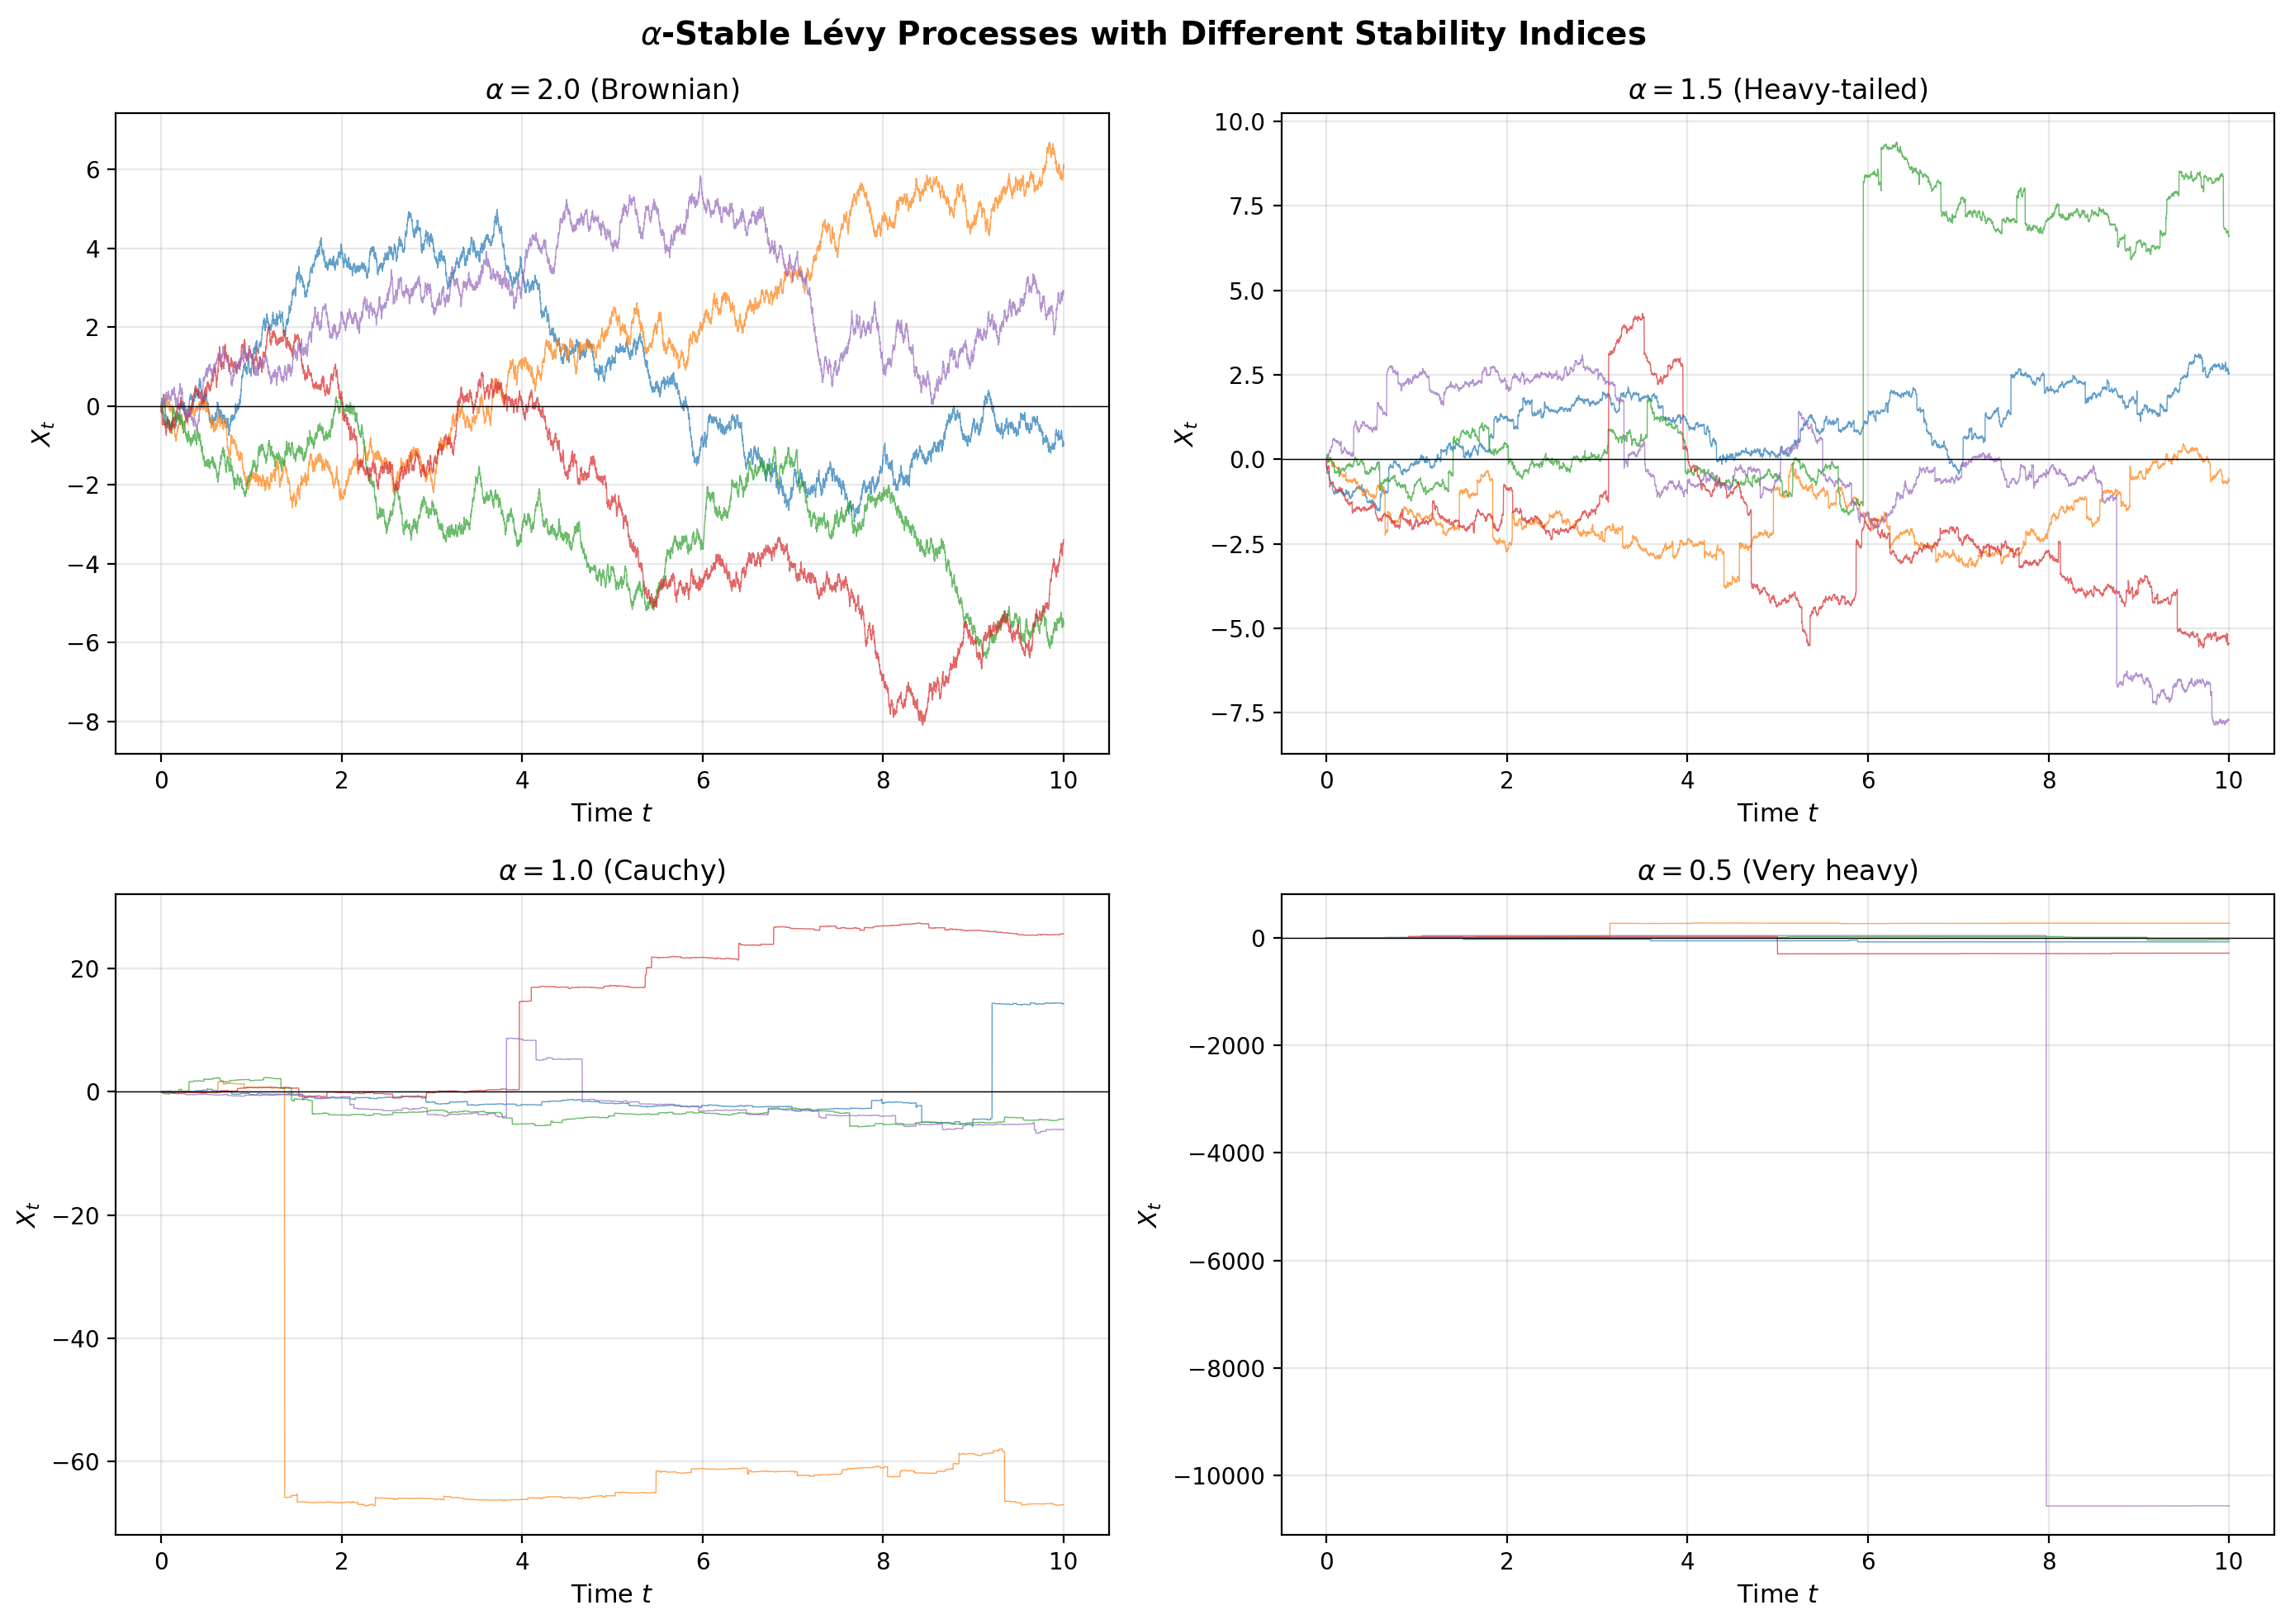


Figure saved to 'plot.png'


In [2]:
# Simulation parameters
T = 10.0           # Final time
n_steps = 10000    # Number of time steps
n_paths = 5        # Number of sample paths per alpha

# Different stability indices to compare
alphas = [2.0, 1.5, 1.0, 0.5]
colors = ['blue', 'green', 'orange', 'red']
labels = [
    r'$\alpha=2.0$ (Brownian)',
    r'$\alpha=1.5$ (Heavy-tailed)',
    r'$\alpha=1.0$ (Cauchy)',
    r'$\alpha=0.5$ (Very heavy)'
]

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (alpha, color, label) in enumerate(zip(alphas, colors, labels)):
    ax = axes[idx]
    
    # Simulate process
    t, X = simulate_levy_process(T, n_steps, alpha, beta=0, n_paths=n_paths)
    
    # Plot sample paths
    for i in range(n_paths):
        ax.plot(t, X[i], alpha=0.7, linewidth=0.5)
    
    ax.set_xlabel('Time $t$', fontsize=11)
    ax.set_ylabel('$X_t$', fontsize=11)
    ax.set_title(label, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)

plt.suptitle(r'$\alpha$-Stable Lévy Processes with Different Stability Indices', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('levy_processes_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## 5. Statistical Analysis

### 5.1 Verifying Heavy Tails

We examine the distribution of increments for different $\alpha$ values and compare with the theoretical tail behavior:

$$P(|X| > x) \propto x^{-\alpha}$$

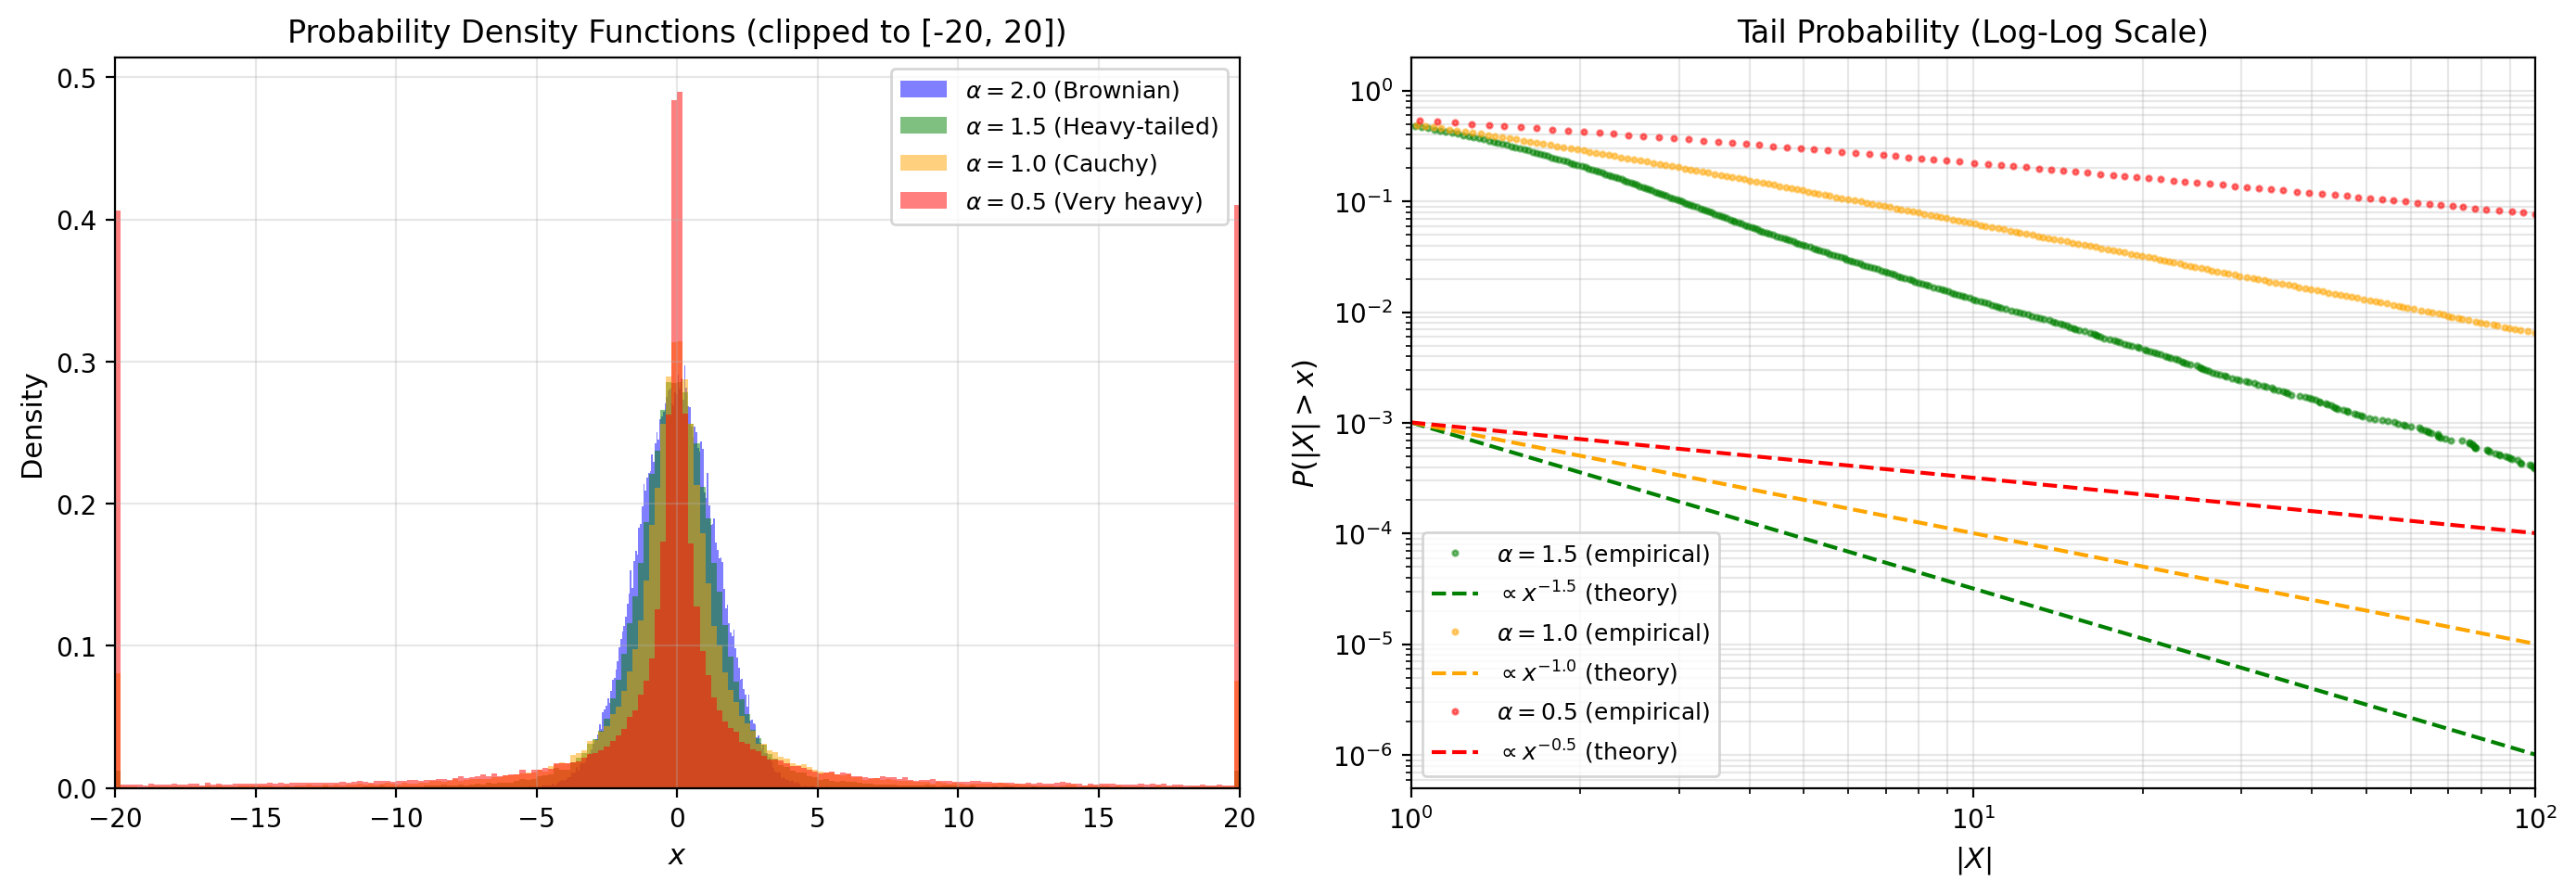


Sample Statistics (n = 100,000)
Alpha              Mean      Std Dev     Kurtosis
------------------------------------------------------------
2.0              0.0024       1.4173       0.0243
1.5             -0.0083       7.5306    5608.0727
1.0             -0.0270      35.9760     502.0513
0.5             -0.6956     184.4584      22.2988
Note: For α < 2, variance is theoretically infinite.
      For α ≤ 1, mean is theoretically undefined.


In [3]:
# Generate large samples for statistical analysis
n_samples = 100000

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Histogram comparison
ax1 = axes[0]
for alpha, color, label in zip(alphas, colors, labels):
    samples = simulate_stable(alpha, beta=0, scale=1, size=n_samples)
    # Clip for visualization (heavy tails extend very far)
    samples_clipped = np.clip(samples, -20, 20)
    ax1.hist(samples_clipped, bins=200, density=True, alpha=0.5, 
             color=color, label=label, histtype='stepfilled')

ax1.set_xlabel('$x$', fontsize=11)
ax1.set_ylabel('Density', fontsize=11)
ax1.set_title('Probability Density Functions (clipped to [-20, 20])', fontsize=12)
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim(-20, 20)
ax1.grid(True, alpha=0.3)

# Right: Log-log tail plot
ax2 = axes[1]
for alpha, color in zip([1.5, 1.0, 0.5], ['green', 'orange', 'red']):
    samples = np.abs(simulate_stable(alpha, beta=0, scale=1, size=n_samples))
    samples_sorted = np.sort(samples)[::-1]
    
    # Empirical tail probability
    tail_prob = np.arange(1, len(samples_sorted) + 1) / n_samples
    
    # Subsample for plotting
    indices = np.logspace(0, np.log10(n_samples-1), 500).astype(int)
    indices = np.unique(indices)
    
    ax2.loglog(samples_sorted[indices], tail_prob[indices], 
               'o', markersize=2, alpha=0.5, color=color,
               label=rf'$\alpha={alpha}$ (empirical)')
    
    # Theoretical slope line
    x_theory = np.logspace(0, 2, 100)
    y_theory = x_theory**(-alpha) * tail_prob[100]  # Normalize
    ax2.loglog(x_theory, y_theory, '--', color=color, linewidth=1.5,
               label=rf'$\propto x^{{-{alpha}}}$ (theory)')

ax2.set_xlabel('$|X|$', fontsize=11)
ax2.set_ylabel('$P(|X| > x)$', fontsize=11)
ax2.set_title('Tail Probability (Log-Log Scale)', fontsize=12)
ax2.legend(loc='lower left', fontsize=9)
ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlim(1, 100)

plt.tight_layout()
plt.show()

# Compute sample statistics
print("\n" + "="*60)
print("Sample Statistics (n = {:,})".format(n_samples))
print("="*60)
print(f"{'Alpha':<10} {'Mean':>12} {'Std Dev':>12} {'Kurtosis':>12}")
print("-"*60)

for alpha in alphas:
    samples = simulate_stable(alpha, beta=0, scale=1, size=n_samples)
    # Clip extreme values for stable statistics computation
    samples_clipped = np.clip(samples, -1000, 1000)
    mean = np.mean(samples_clipped)
    std = np.std(samples_clipped)
    kurt = stats.kurtosis(samples_clipped)
    print(f"{alpha:<10.1f} {mean:>12.4f} {std:>12.4f} {kurt:>12.4f}")

print("="*60)
print("Note: For α < 2, variance is theoretically infinite.")
print("      For α ≤ 1, mean is theoretically undefined.")

## 6. Self-Similarity and Scaling

### 6.1 Self-Similarity Property

An $\alpha$-stable Lévy process $X_t$ is **self-similar** with index $H = 1/\alpha$:

$$\{X_{ct}\}_{t \geq 0} \stackrel{d}{=} \{c^{1/\alpha} X_t\}_{t \geq 0}$$

This means the process looks statistically similar at all time scales when properly rescaled.

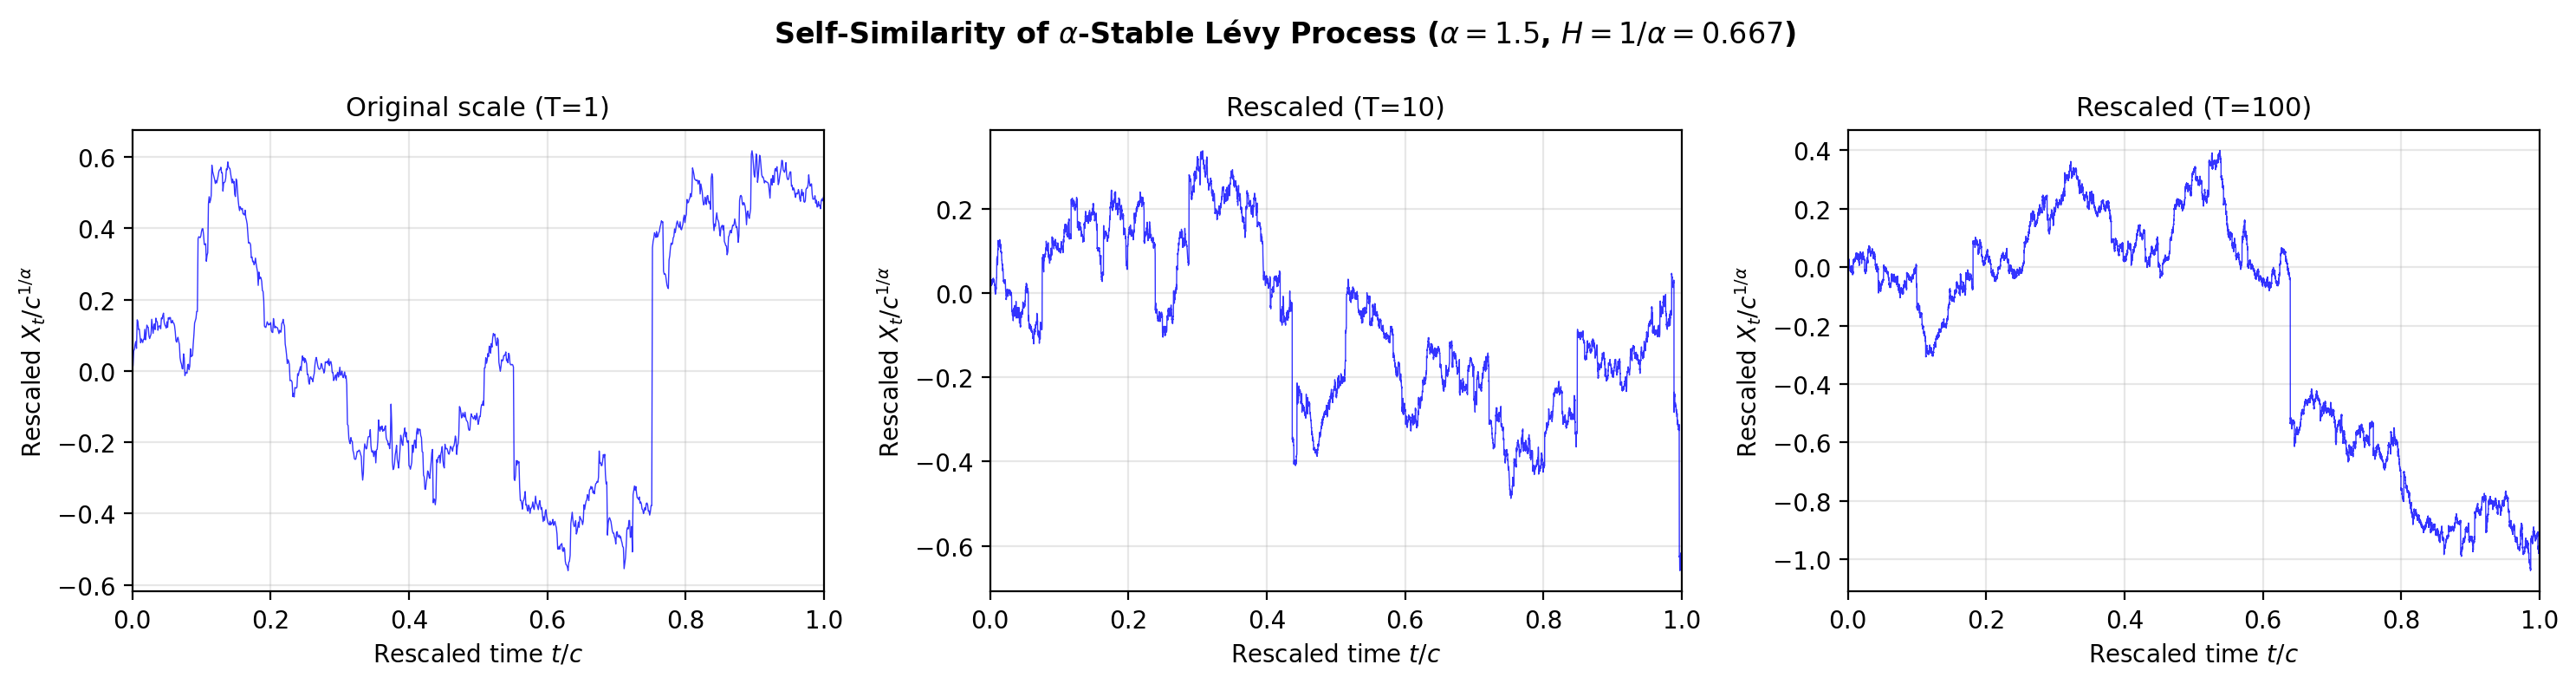


Self-similarity index H = 1/α = 0.6667
The rescaled paths have the same statistical distribution.


In [4]:
# Demonstrate self-similarity
alpha = 1.5
H = 1 / alpha  # Hurst-like exponent

# Simulate a long path
T_long = 100.0
n_steps_long = 100000
t_long, X_long = simulate_levy_process(T_long, n_steps_long, alpha, n_paths=1)
X_long = X_long[0]  # Single path

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Different time scales
scales = [1, 10, 100]
titles = ['Original scale (T=1)', 'Rescaled (T=10)', 'Rescaled (T=100)']

for ax, scale, title in zip(axes, scales, titles):
    # Extract segment [0, scale]
    mask = t_long <= scale
    t_segment = t_long[mask]
    X_segment = X_long[mask]
    
    # Rescale time to [0,1] and space by c^(1/alpha)
    t_rescaled = t_segment / scale
    X_rescaled = X_segment / (scale ** H)
    
    ax.plot(t_rescaled, X_rescaled, 'b-', linewidth=0.5, alpha=0.8)
    ax.set_xlabel('Rescaled time $t/c$', fontsize=10)
    ax.set_ylabel(r'Rescaled $X_t / c^{1/\alpha}$', fontsize=10)
    ax.set_title(title, fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)

plt.suptitle(rf'Self-Similarity of $\alpha$-Stable Lévy Process ($\alpha={alpha}$, $H=1/\alpha={H:.3f}$)', 
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nSelf-similarity index H = 1/α = {H:.4f}")
print("The rescaled paths have the same statistical distribution.")

## 7. Jump Structure Analysis

### 7.1 Lévy Measure and Jump Intensity

The Lévy measure $\nu(dx)$ describes the intensity of jumps of different sizes. For symmetric $\alpha$-stable processes:

$$\nu(dx) = \frac{c_\alpha}{|x|^{1+\alpha}} dx$$

where $c_\alpha$ is a normalizing constant. This implies:
- Small jumps occur infinitely often (integral diverges near 0 for $\alpha < 2$)
- Large jumps follow a power law (rare but significant)

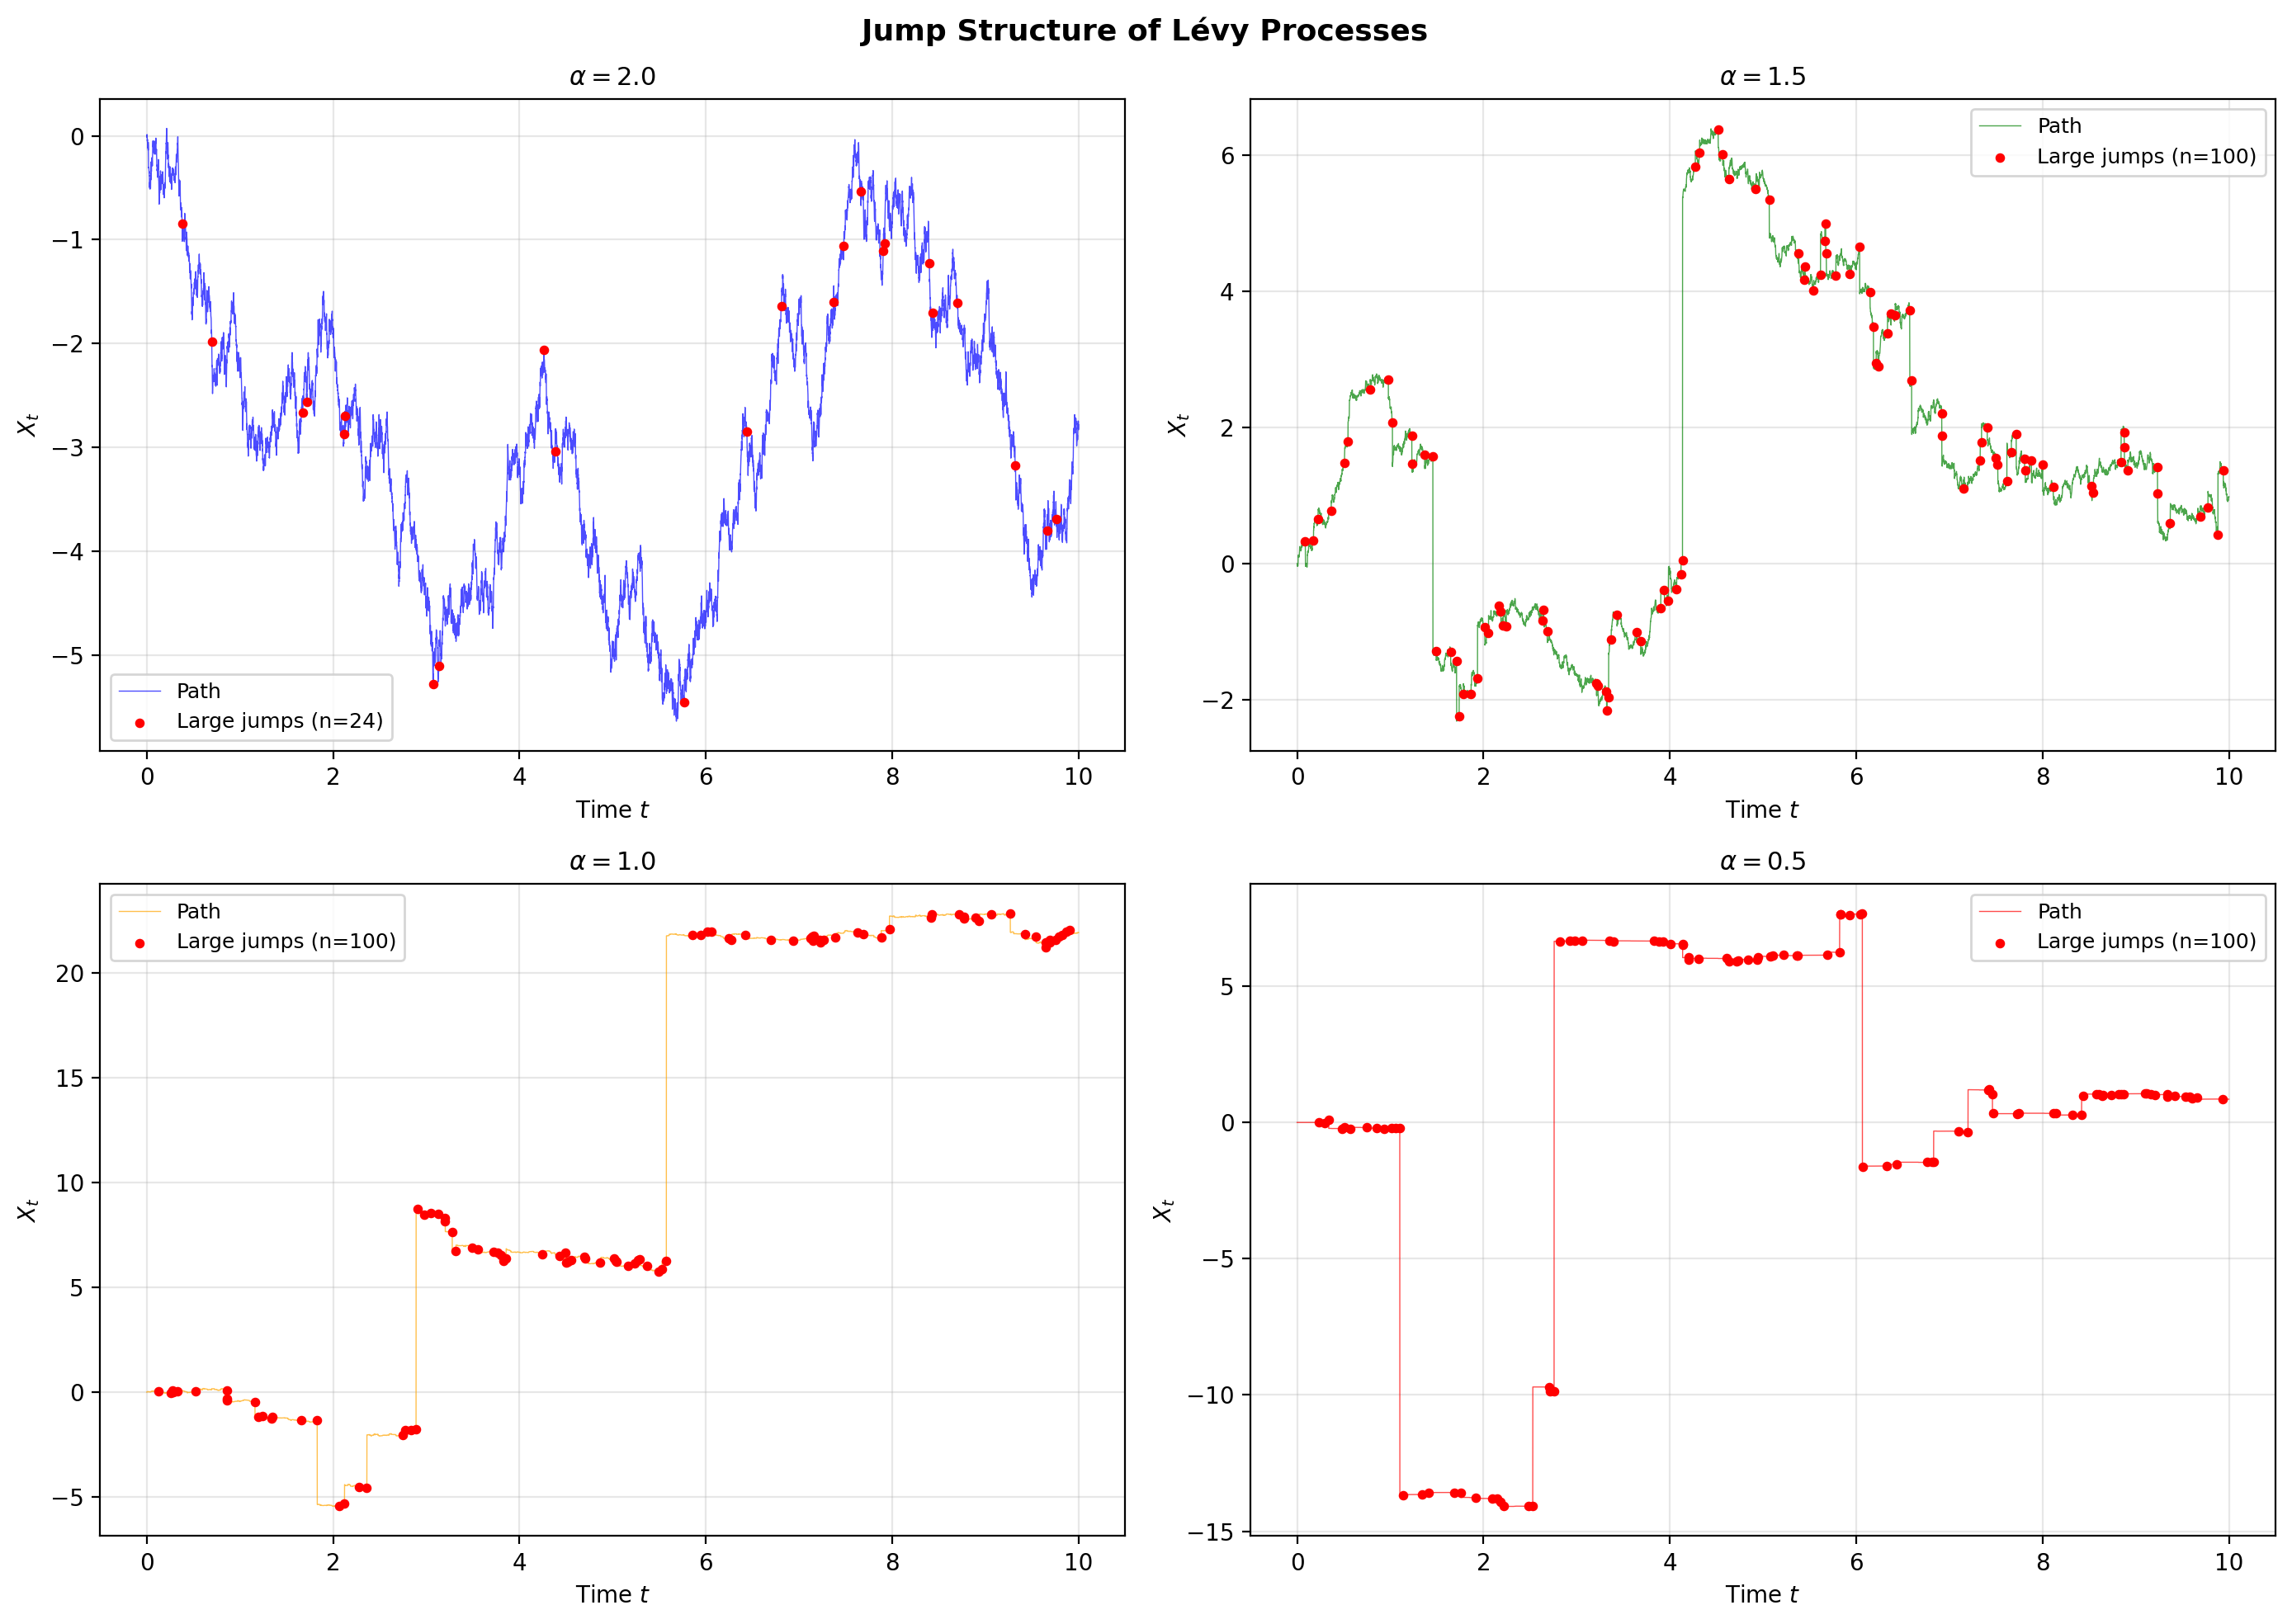


Jump Statistics
Alpha           Max |Jump|       99th %ile       Jump Rate
------------------------------------------------------------
2.0                 0.1758          0.1170           50.00
1.5                11.8747          0.1162           50.00
1.0                20.9297          0.0629           50.00
0.5               216.9350          0.0074           50.00


In [5]:
# Analyze jump structure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

T = 10.0
n_steps = 10000
dt = T / n_steps

for idx, (alpha, color) in enumerate(zip([2.0, 1.5, 1.0, 0.5], colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Simulate and get increments
    t, X = simulate_levy_process(T, n_steps, alpha, n_paths=1)
    increments = np.diff(X[0])
    
    # Identify large jumps (above threshold)
    threshold = 3 * np.std(increments) if alpha == 2 else np.percentile(np.abs(increments), 99)
    large_jumps = np.abs(increments) > threshold
    
    # Plot path
    ax.plot(t, X[0], color=color, linewidth=0.5, alpha=0.7, label='Path')
    
    # Mark large jumps
    jump_times = t[:-1][large_jumps]
    jump_vals = X[0][:-1][large_jumps]
    ax.scatter(jump_times, jump_vals, c='red', s=10, zorder=5, 
               label=f'Large jumps (n={sum(large_jumps)})')
    
    ax.set_xlabel('Time $t$', fontsize=10)
    ax.set_ylabel('$X_t$', fontsize=10)
    ax.set_title(rf'$\alpha = {alpha}$', fontsize=11)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Jump Structure of Lévy Processes', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistics on jumps
print("\n" + "="*60)
print("Jump Statistics")
print("="*60)
print(f"{'Alpha':<10} {'Max |Jump|':>15} {'99th %ile':>15} {'Jump Rate':>15}")
print("-"*60)

for alpha in alphas:
    t, X = simulate_levy_process(T, n_steps, alpha, n_paths=1)
    increments = np.abs(np.diff(X[0]))
    threshold = np.percentile(increments, 95)
    jump_rate = np.sum(increments > threshold) / T
    print(f"{alpha:<10.1f} {np.max(increments):>15.4f} {np.percentile(increments, 99):>15.4f} {jump_rate:>15.2f}")

## 8. Conclusions

### Key Findings

1. **Heavy Tails**: As $\alpha$ decreases, the process exhibits heavier tails, leading to more extreme jumps and larger deviations from the origin.

2. **Self-Similarity**: $\alpha$-stable Lévy processes are self-similar with index $H = 1/\alpha$, meaning they exhibit the same statistical properties at all time scales.

3. **Infinite Variance**: For $\alpha < 2$, the variance is infinite, which has profound implications for risk modeling and estimation.

4. **Jump Structure**: The Lévy measure governs the intensity and size distribution of jumps, with power-law behavior characteristic of stable processes.

### Applications

Lévy processes are fundamental in:
- **Mathematical Finance**: Modeling asset returns with jumps (e.g., Merton's jump-diffusion model)
- **Physics**: Anomalous diffusion, Lévy flights in foraging behavior
- **Insurance**: Heavy-tailed claim distributions
- **Telecommunications**: Network traffic modeling

### References

1. Applebaum, D. (2009). *Lévy Processes and Stochastic Calculus*. Cambridge University Press.
2. Cont, R. & Tankov, P. (2004). *Financial Modelling with Jump Processes*. Chapman & Hall/CRC.
3. Samorodnitsky, G. & Taqqu, M.S. (1994). *Stable Non-Gaussian Random Processes*. Chapman & Hall.